In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Тип задачи - регрессия. Целевая переменная - `song_popularity`

In [4]:
!python --version

Python 3.12.12


In [6]:
seed = 42
np.random.seed(seed)

In [7]:
data = pd.read_csv('song_data.csv')
data

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [10]:
from sklearn.model_selection import train_test_split

data = data.drop(['song_name'], axis=1)

y = data['song_popularity']
X = data.drop(['song_popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4501,194728,0.583000,0.331,0.263,0.034800,6,0.1830,-13.987,1,0.0964,175.839,4,0.499
12204,269146,0.019600,0.819,0.759,0.000007,10,0.0613,-4.115,0,0.1470,108.026,4,0.880
10675,204013,0.054900,0.564,0.714,0.000000,7,0.1550,-4.987,1,0.1290,175.924,4,0.330
11146,84371,0.922000,0.667,0.209,0.932000,10,0.1240,-13.383,0,0.0501,148.152,4,0.664
1664,241560,0.000173,0.341,0.912,0.000000,6,0.2160,-5.465,1,0.0936,170.057,4,0.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,181069,0.651000,0.712,0.339,0.000845,7,0.0829,-15.237,1,0.0510,123.753,4,0.886
11964,157421,0.046300,0.552,0.573,0.000000,9,0.1050,-6.585,1,0.0948,182.140,4,0.525
5390,196666,0.641000,0.574,0.170,0.000000,7,0.1200,-17.717,1,0.0267,87.180,3,0.491
860,311506,0.003720,0.865,0.836,0.005510,1,0.3010,-6.088,1,0.2250,102.754,4,0.248


In [11]:
from matplotlib.axes._axes import Axes


def draw_sns(df, visualization_function, figsize=(20, 20), **kwargs):
    n_col = 3
    n = len(df.columns)
    n_row = int(np.ceil(n / n_col))

    _, ax = plt.subplots(n_row, n_col, figsize=figsize)

    columns = df.columns

    for i in range(n_row):
        for j in range(n_col):
            k = i * n_col + j
            if k == n:
                break
            column = columns[k]
            x = df[column]
            visualization_function(x, ax=ax[i, j], **kwargs)

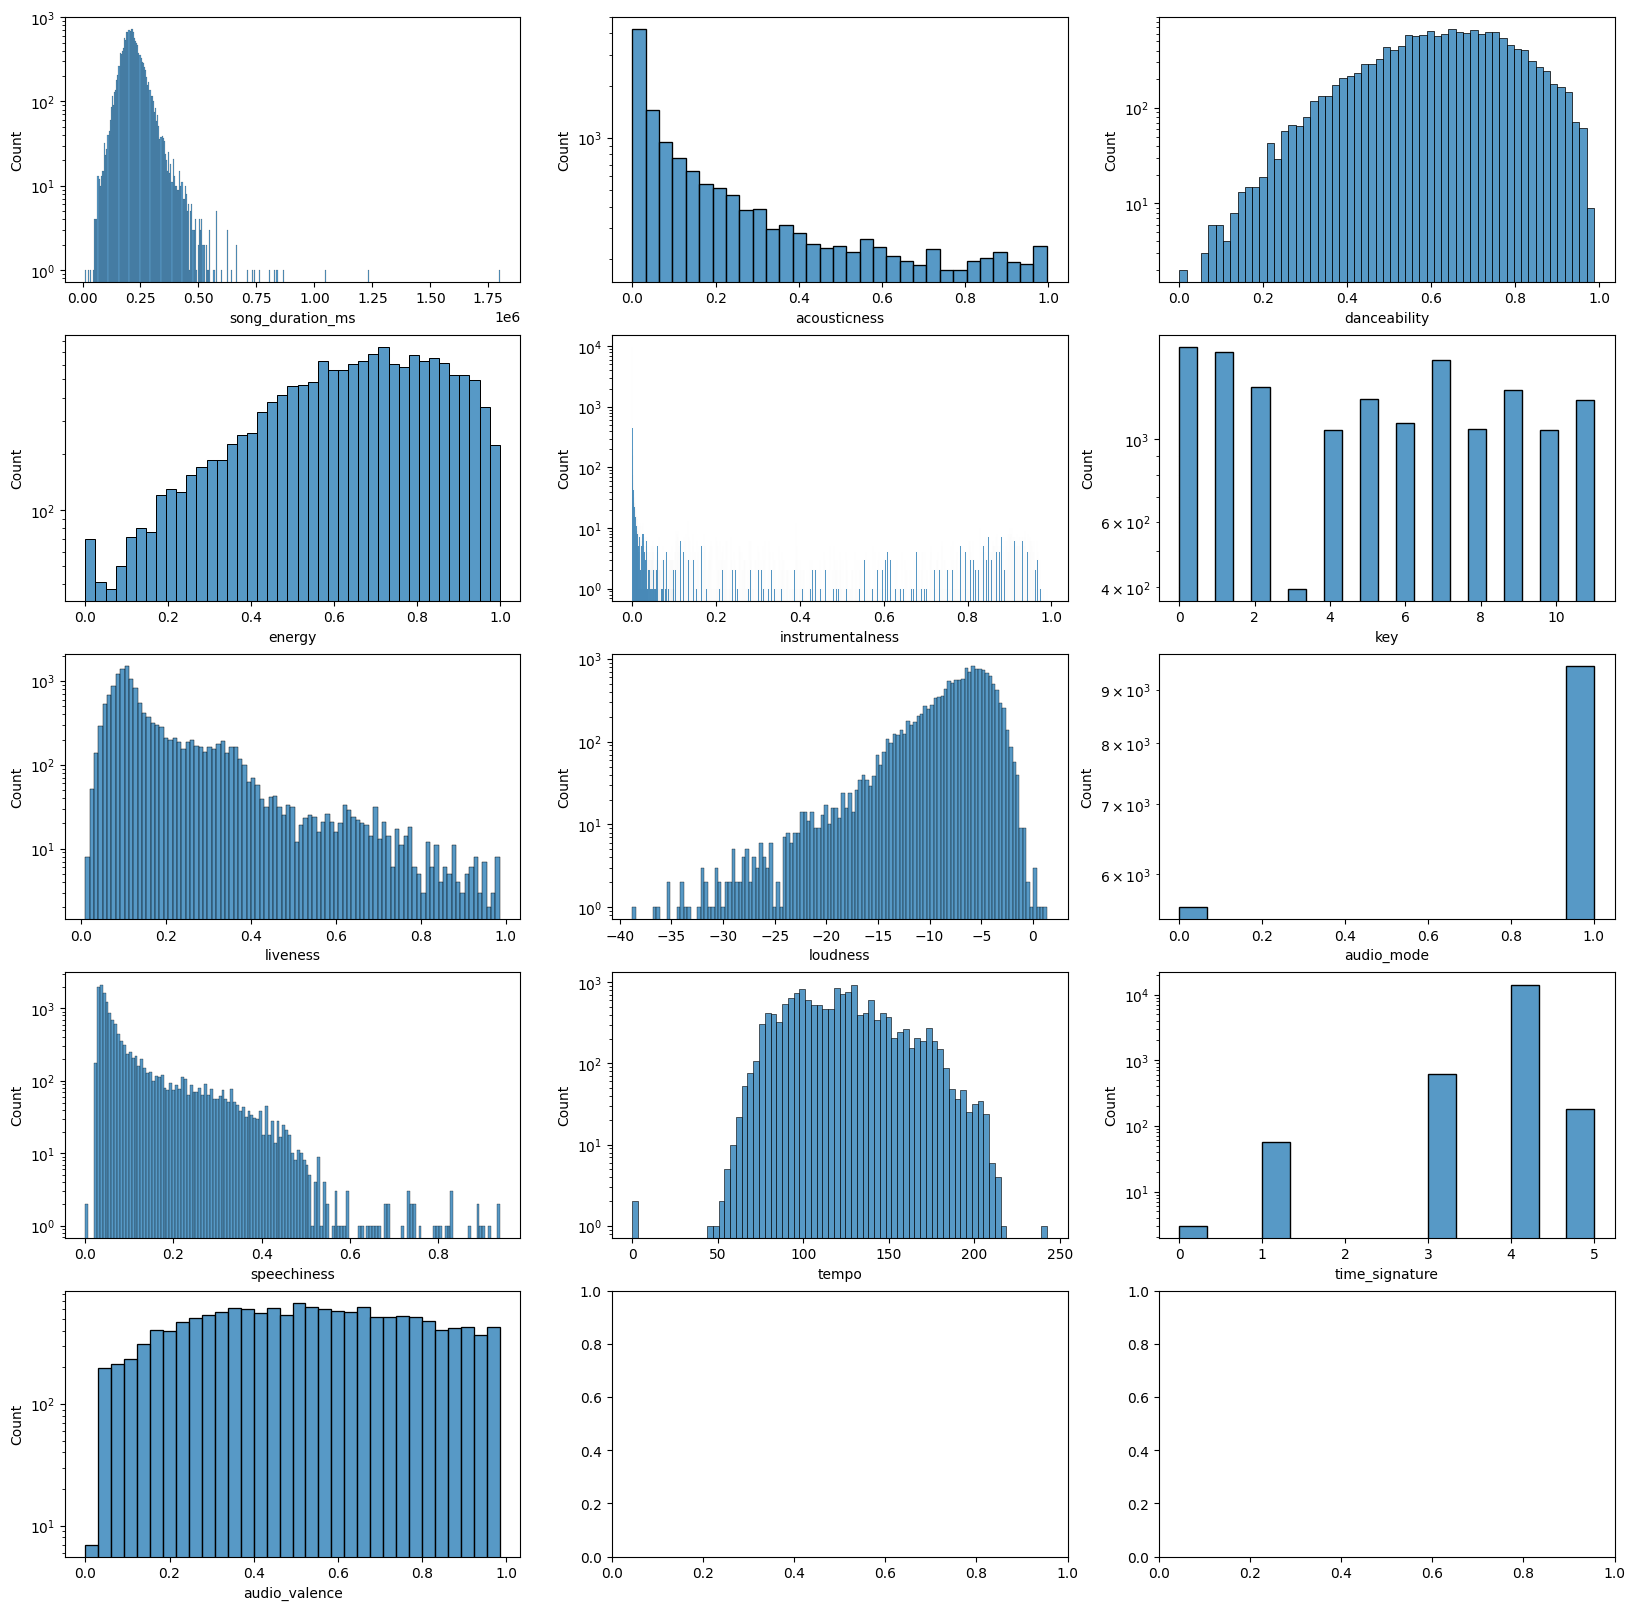

In [15]:
draw_sns(X_train, visualization_function=sns.histplot, log=True)

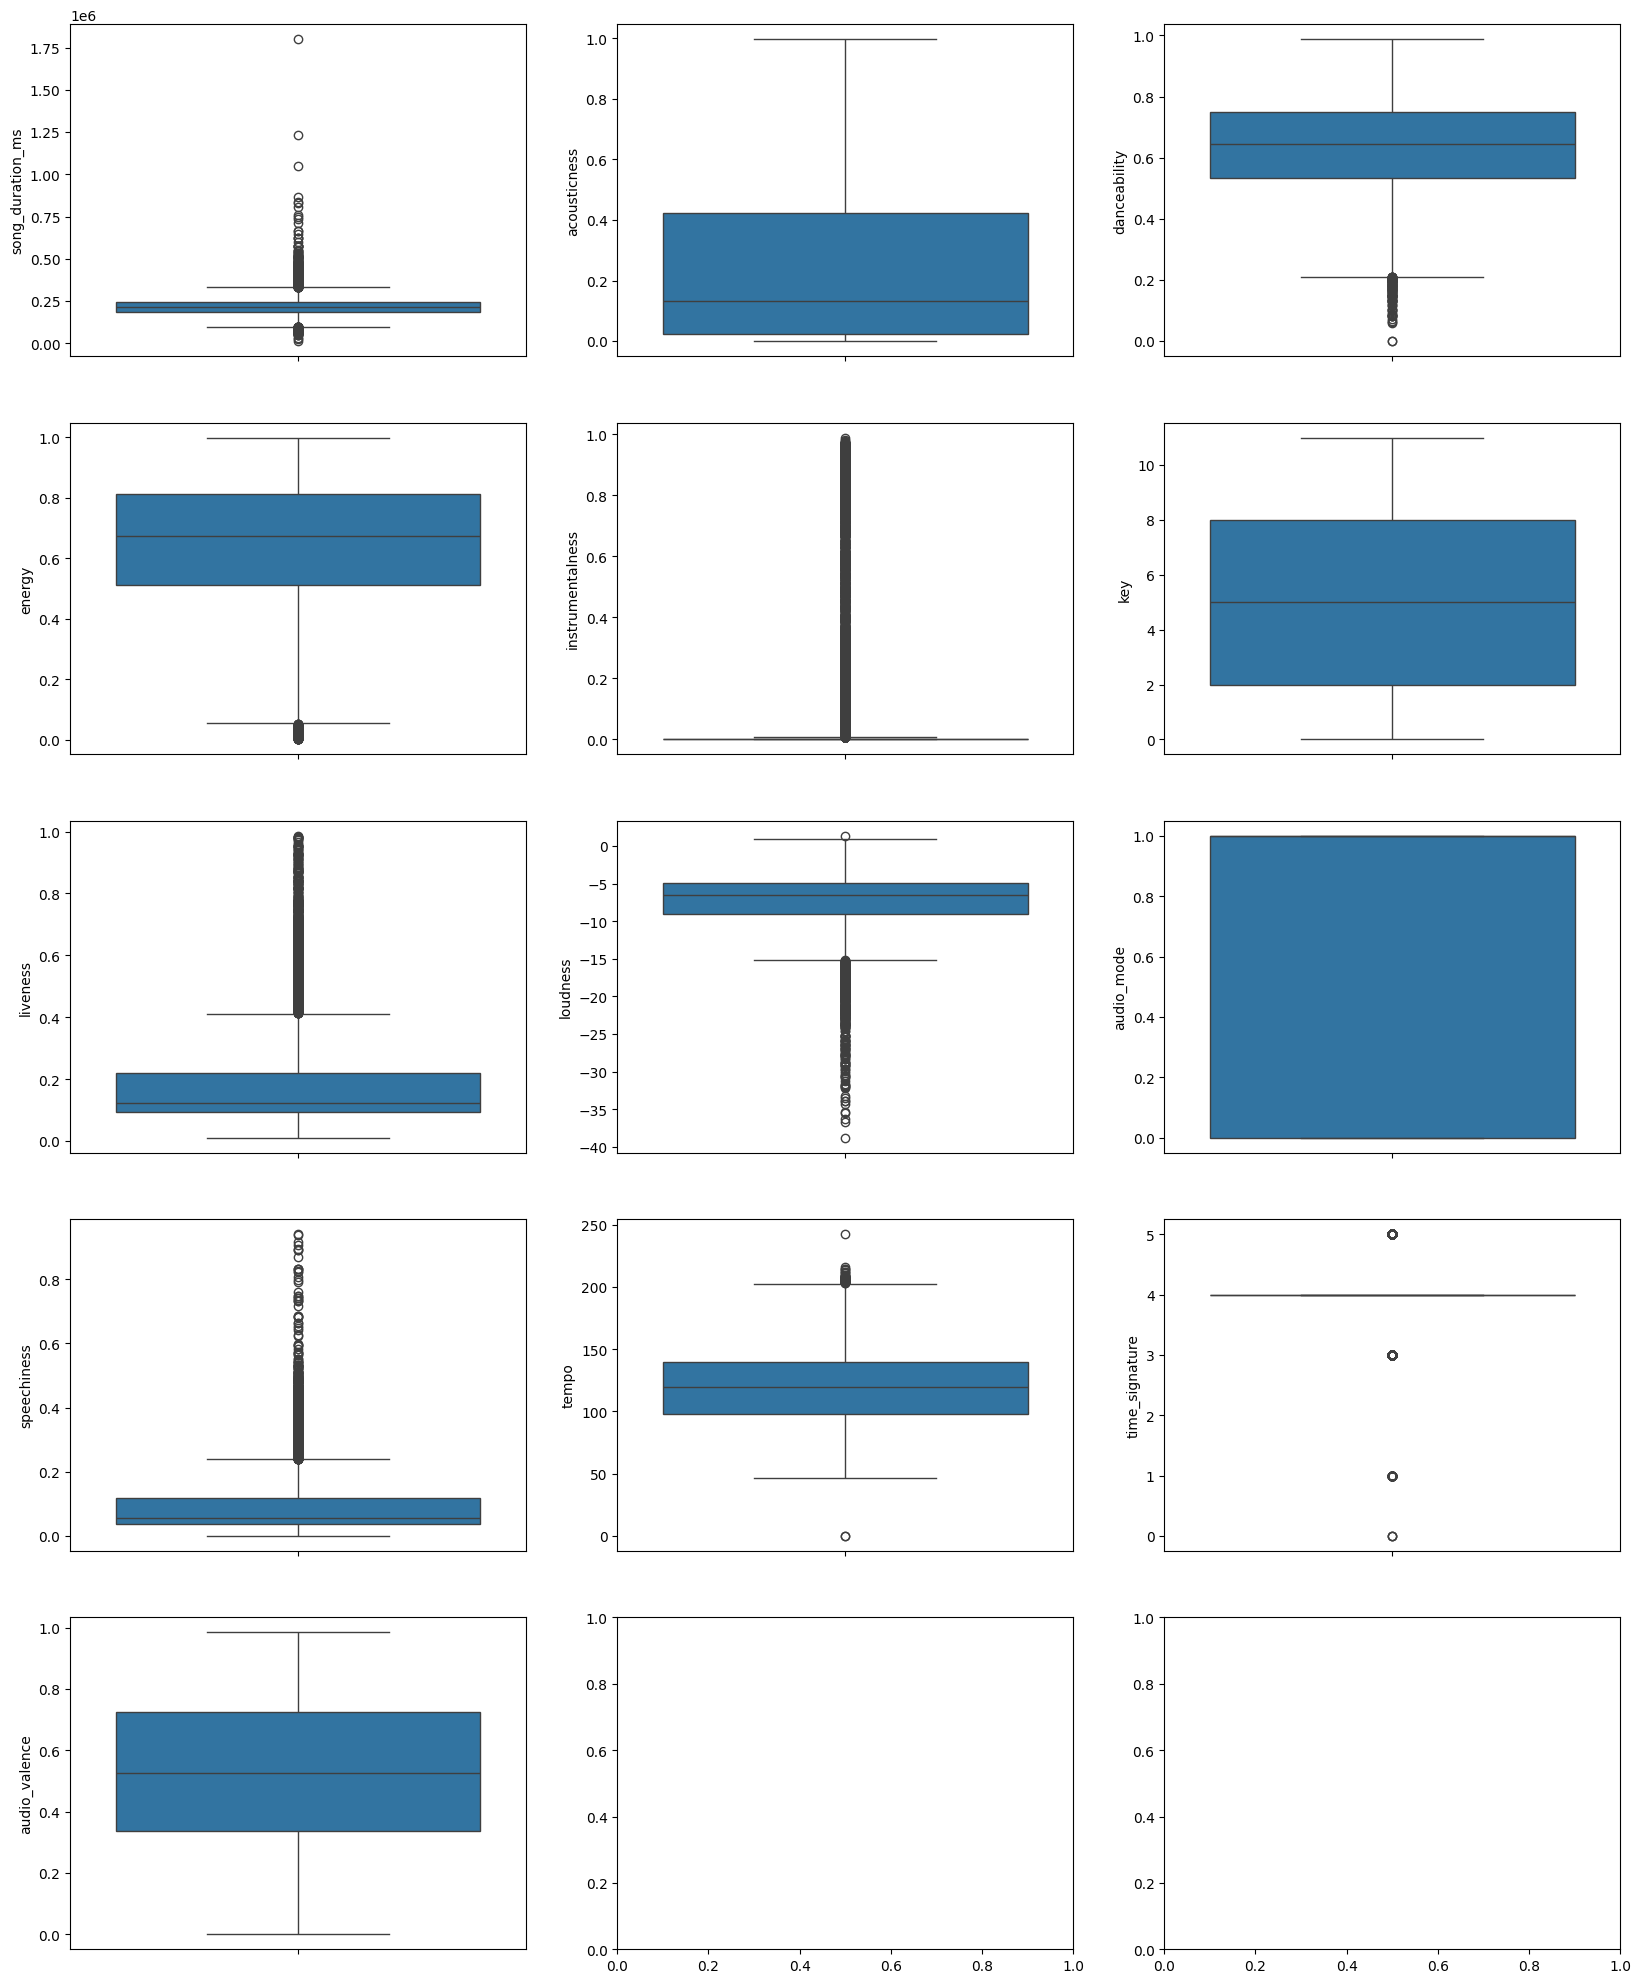

In [17]:
draw_sns(X_train, sns.boxplot, figsize=(20, 25))

In [19]:
def calc_bounds(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

In [20]:
def check_feature_outliers_iqr(x: pd.Series):
    lower_bound, upper_bound = calc_bounds(x)
    return ((x < lower_bound) | (x > upper_bound)).values

In [21]:
def check_dataset_outliers(df, outliers_method, **kwargs):
    outliers_flags = [
        outliers_method(df[column], **kwargs) for column in df.columns
    ]
    return np.any(np.array(outliers_flags), axis=0)

In [23]:
outliers_objects_iqr = X_train.loc[check_dataset_outliers(X_train[['song_duration_ms', 'energy', 'loudness']], check_feature_outliers_iqr)]
outliers_objects_iqr

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
11146,84371,0.9220,0.667,0.2090,0.932000,10,0.1240,-13.383,0,0.0501,148.152,4,0.6640
9100,284466,0.0933,0.891,0.3190,0.000104,4,0.0482,-16.099,0,0.3330,92.649,4,0.6870
1354,201933,0.9050,0.266,0.0596,0.000071,0,0.1320,-18.515,1,0.0363,181.740,3,0.1430
4149,124589,0.9850,0.494,0.0345,0.952000,4,0.2230,-19.240,0,0.0374,70.907,4,0.1920
5933,350752,0.9740,0.066,0.0176,0.904000,4,0.0956,-32.195,0,0.0602,61.941,4,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14502,185666,0.8810,0.560,0.1560,0.000019,5,0.2410,-17.285,1,0.0497,126.640,4,0.5580
4426,92000,0.9640,0.804,0.2250,0.929000,6,0.1030,-15.623,0,0.0798,85.125,4,0.5940
16850,379226,0.0105,0.556,0.4500,0.048300,5,0.0707,-11.874,1,0.0338,117.990,3,0.2500
11284,181069,0.6510,0.712,0.3390,0.000845,7,0.0829,-15.237,1,0.0510,123.753,4,0.8860


In [26]:
X_train_pure = X_train.drop(outliers_objects_iqr.index)
y_train_pure = y_train.drop(outliers_objects_iqr.index)
y_train_pure

,song_popularity
4501,62
12204,50
10675,79
1664,50
12983,9
...,...
14423,55
6265,44
11964,74
860,44


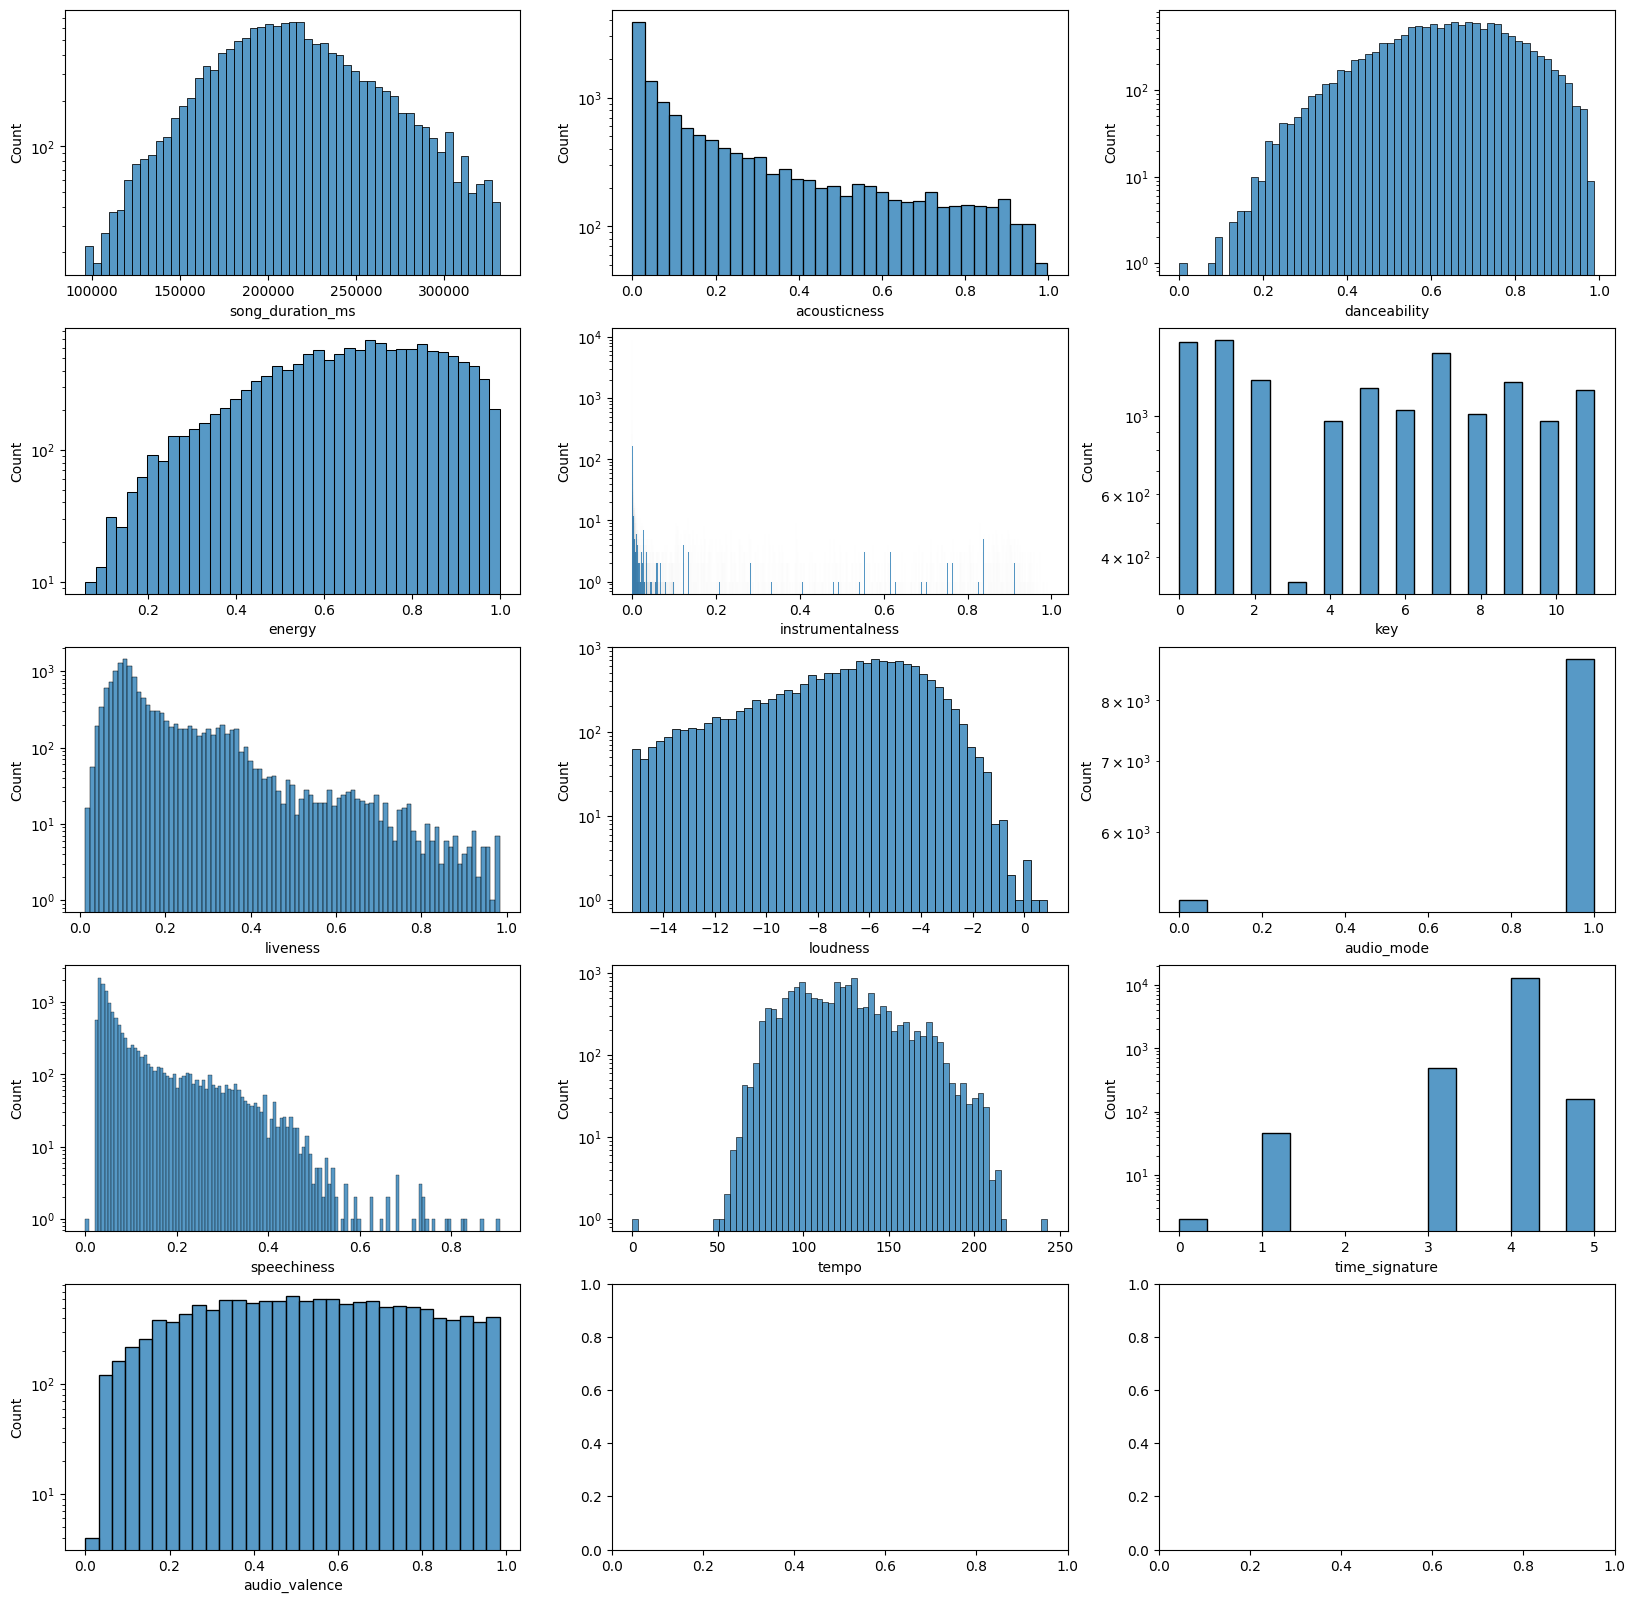

In [28]:
draw_sns(X_train_pure, visualization_function=sns.histplot, log=True)

In [29]:
def draw_anomaly(X_2d, anomaly_mask):
    plt.scatter(X_2d[:, 0], X_2d[:, 1])
    plt.scatter(X_2d[anomaly_mask, 0], X_2d[anomaly_mask, 1], c="red", marker='x')

In [30]:
def draw_anomaly_pie(anomaly_mask):
    _, counts = np.unique(anomaly_mask, return_counts=True)

    plt.pie(counts, labels=counts, autopct='%1.0f%%');
    plt.legend([
        'Нормальные объекты', 'Аномалии'
    ], loc='lower right');

In [31]:
from umap.umap_ import UMAP

X_2d = UMAP().fit_transform(X_train_pure)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [33]:
!pip install pyod

from pyod.models.iforest import IForest


isf = IForest().fit(X_train_pure)
isf_anomaly = isf.predict(X_train_pure)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 8.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


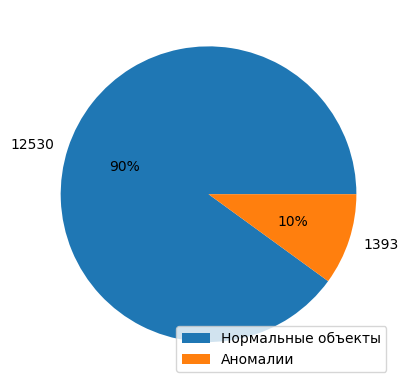

In [34]:
draw_anomaly_pie(isf_anomaly)

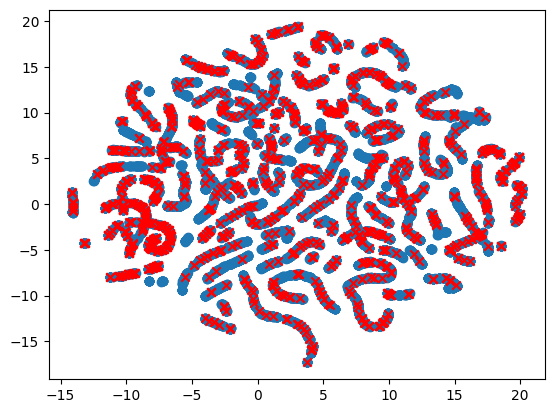

In [35]:
draw_anomaly(X_2d, isf_anomaly.astype(bool))

In [36]:
from pyod.models.ocsvm import OCSVM


ocsvm = OCSVM().fit(X_train_pure)
ocsvm_anomaly = ocsvm.predict(X_train_pure)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


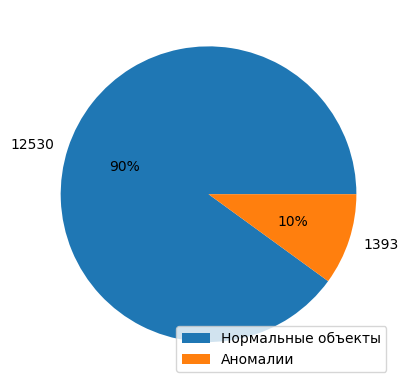

In [37]:
draw_anomaly_pie(ocsvm_anomaly)

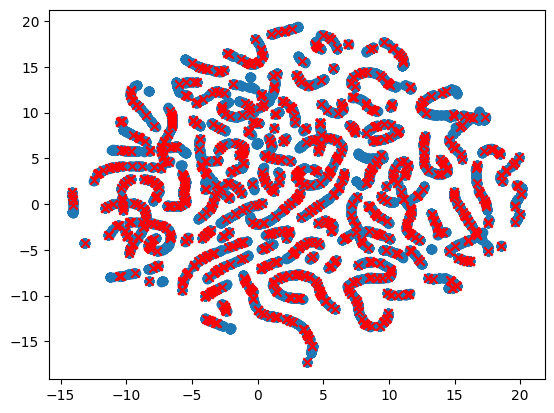

In [38]:
draw_anomaly(X_2d, ocsvm_anomaly.astype(bool))

In [39]:
from pyod.models.lof import LOF

lf = LOF().fit(X_train_pure)
lf_anomaly = lf.predict(X_train_pure)

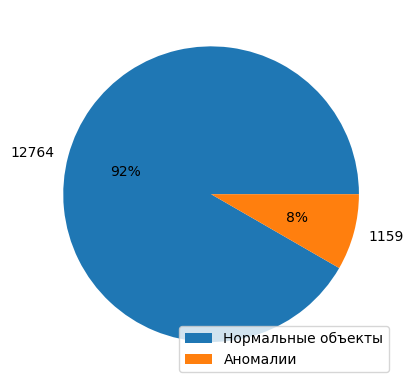

In [40]:
draw_anomaly_pie(lf_anomaly)

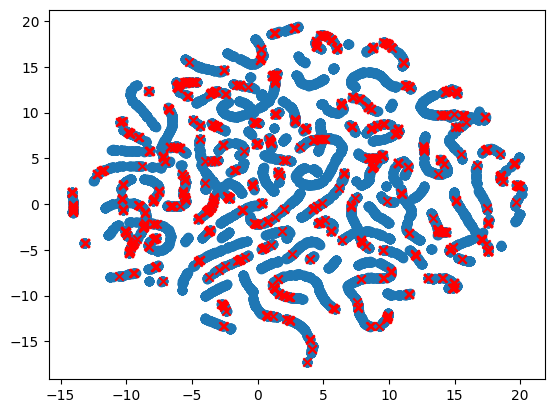

In [41]:
draw_anomaly(X_2d, lf_anomaly.astype(bool))

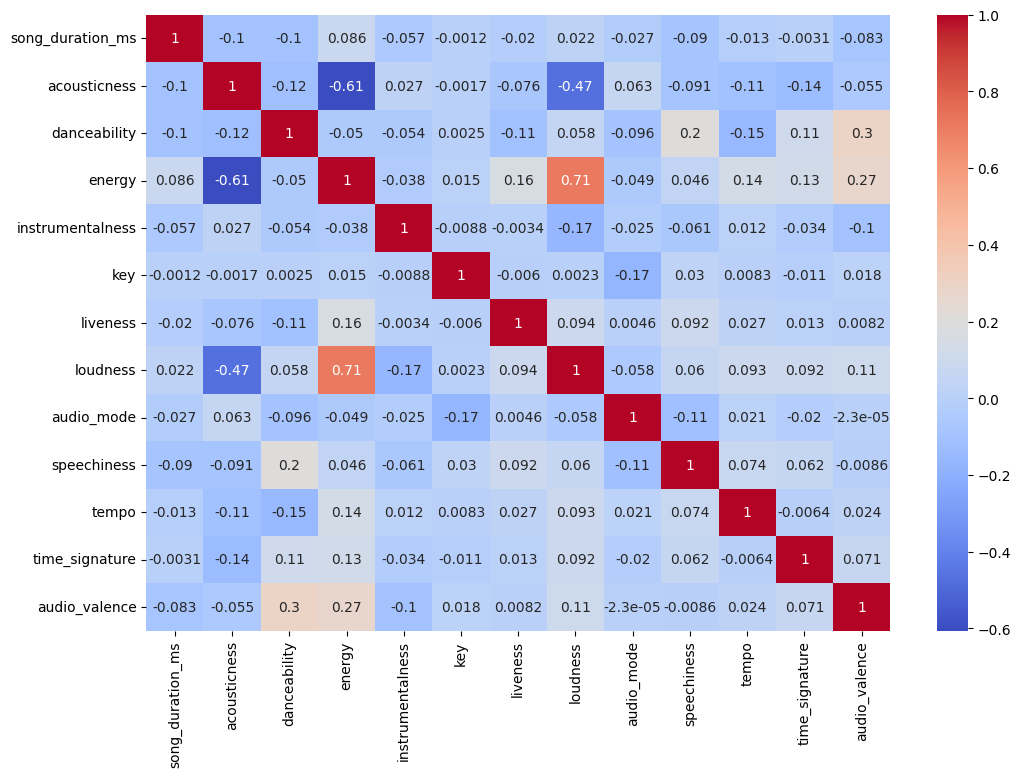

In [42]:
corr = X_train_pure.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

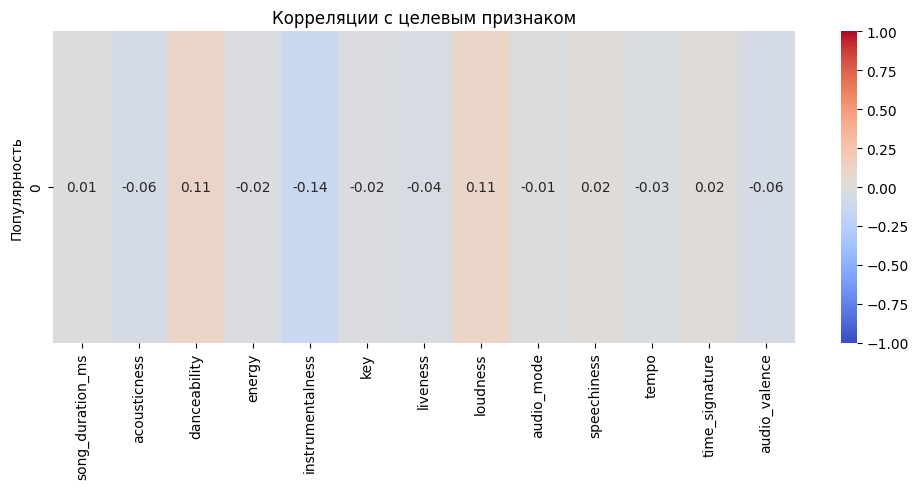

In [44]:
corr_with_target = X_train_pure.corrwith(y_train_pure)
heatmap = pd.DataFrame(corr_with_target).T

plt.figure(figsize=(10, 5))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Корреляции с целевым признаком')
plt.ylabel('Популярность')
plt.tight_layout()
plt.show()

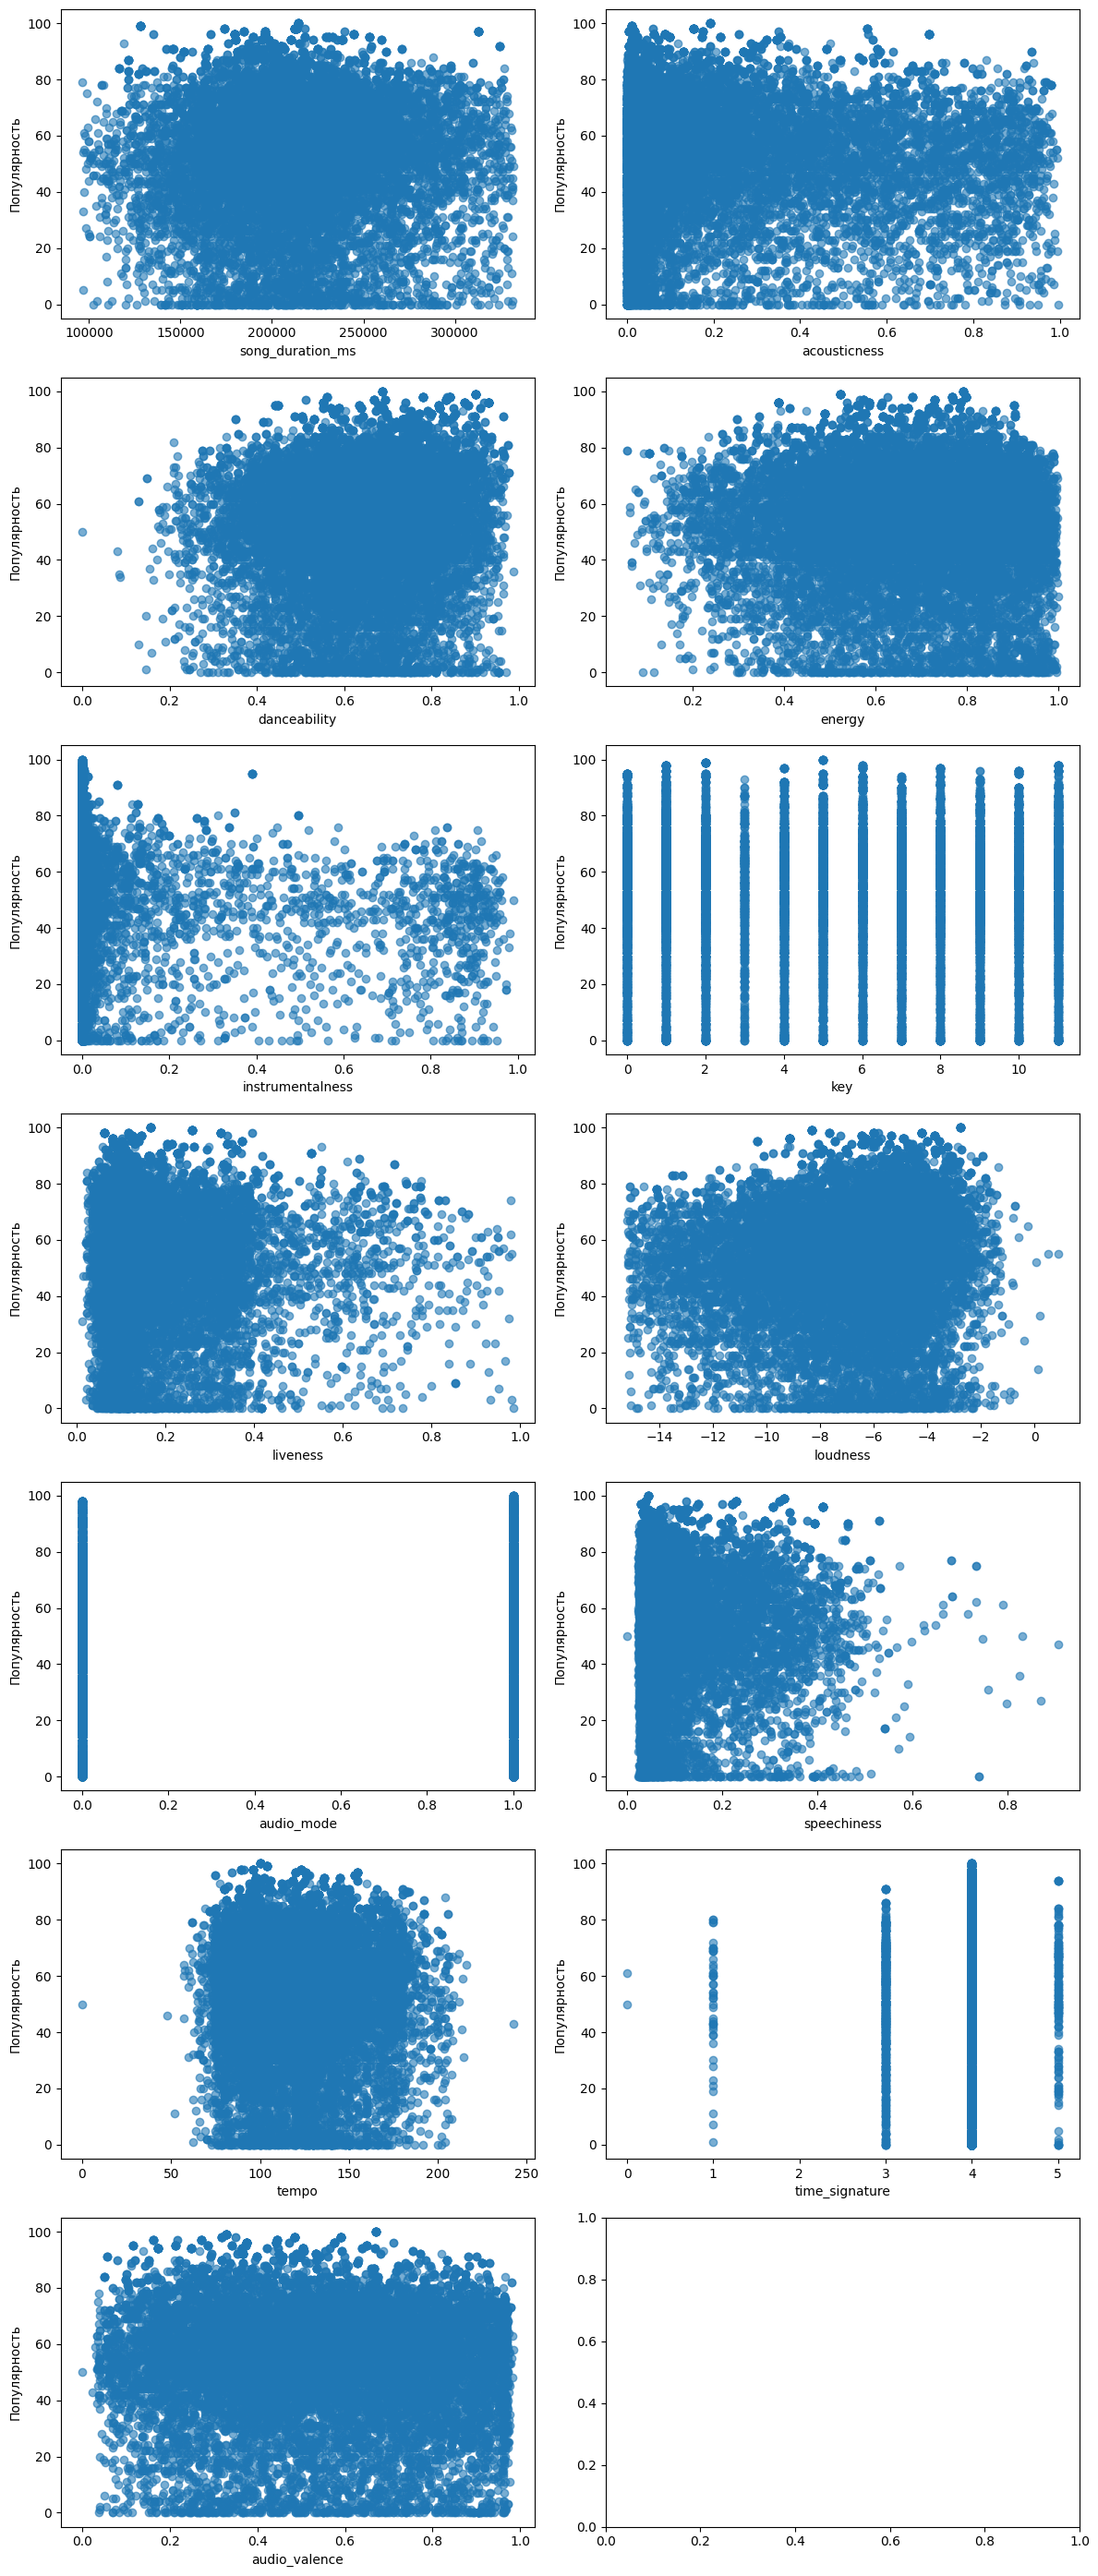

In [45]:
import matplotlib.pyplot as plt

features = X_train_pure.columns
target = y_train_pure

n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()

for idx, feature in enumerate(features):
    axes[idx].scatter(X_train_pure[feature], y_train_pure, alpha=0.6)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Популярность')

plt.tight_layout()
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pure)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_pure.columns, index=X_train_pure.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_train_scaled

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4501,-0.434811,1.300974,-2.045685,-2.061604,-0.110422,0.197608,0.017202,-2.498422,0.767477,-0.063808,1.916853,0.123725,-0.158467
12204,1.304753,-0.809454,1.185198,0.486553,-0.304880,1.305886,-0.829504,0.985396,-1.302971,0.427291,-0.467214,0.123725,1.429458
10675,-0.217769,-0.677225,-0.503071,0.255369,-0.304916,0.474678,-0.177603,0.677668,0.767477,0.252592,1.919841,0.123725,-0.862822
1664,0.659914,-0.882225,-1.979478,1.272577,-0.304916,0.197608,0.246794,0.508982,0.767477,-0.090983,1.713578,0.123725,-0.771131
12983,-0.389556,-0.841294,-1.244585,0.666362,-0.294745,-1.464809,1.638258,0.619793,0.767477,-0.530643,0.580414,0.123725,-1.062875
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14423,-0.206081,0.079818,1.026302,0.532790,-0.156251,-1.187739,-0.607565,0.689314,-1.302971,-0.547142,-0.923721,0.123725,0.825130
6265,0.000442,1.068730,1.575817,-1.136869,-0.304916,-1.187739,-0.421109,0.008572,0.767477,2.426625,0.309709,0.123725,-1.923106
11964,-1.306885,-0.709439,-0.582519,-0.469006,-0.304916,1.028817,-0.525469,0.113735,0.767477,-0.079337,2.138374,0.123725,-0.050104
860,2.294943,-0.868939,1.489748,0.882134,-0.274121,-1.187739,0.838166,0.289126,0.767477,1.184320,-0.652559,0.123725,-1.204580


In [46]:
dtr_params = {
    'max_depth': ('int', [3, 7]),
    'criterion': ('cat', ['squared_error', 'absolute_error', 'poisson']),
    'min_samples_split': ('int', [2, 10])
}

In [47]:
rf_params = {
    'n_estimators': ('cat', [50, 100, 300]),
    'max_depth': ('int', [3, 7]),
    'min_samples_split': ('int', [2, 10])
}

In [48]:
gbr_params = {
    'n_estimators': ('cat', [50, 100, 300]),
    'max_depth': ('int', [3, 7]),
    'min_samples_split': ('int', [2, 10]),
    'loss': ('cat', ['squared_error', 'absolute_error', 'huber', 'quantile'])
}

In [50]:
!pip install optuna

import optuna
from sklearn.model_selection import cross_val_score


def gen_objective(estimator_class, grid, X_train, y_train, **kwargs):
    def objective(trial):
        params = {}
        for k, v in grid.items():
            if v[0] == 'cat':
                params[k] = trial.suggest_categorical(k, v[1])
            elif v[0] == 'int':
                params[k] = trial.suggest_int(k, *v[1])
            elif v[0] == 'float':
                params[k] = trial.suggest_float(k, *v[1], log=True)

        regressor = estimator_class(**params)

        mse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        return -mse_scores.mean()

    return objective

def get_best_params(X, y, model, params):
    my_objective = gen_objective(model, params, X, y)
    study = optuna.create_study(direction="minimize")
    study.optimize(my_objective, n_trials=10)
    return study.best_params

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 11.9 MB/s eta 0:00:00


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score


def get_metrics(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model_name, {'MAE': mae, 'MSE': mse, 'MAPE': mape, 'R2': r2}

In [52]:
metdct = {}

In [56]:
from sklearn.tree import DecisionTreeRegressor

new_feat_dtr = DecisionTreeRegressor(**get_best_params(X_train_pure, y_train_pure, DecisionTreeRegressor, dtr_params))
new_feat_dtr.fit(X_train_pure, y_train_pure)
y_pr = new_feat_dtr.predict(X_test)
name, vals = mtrs = get_metrics('new_feat - DTR', y_test, y_pr)
metdct[name] = vals
mtrs

[I 2026-01-08 13:39:39,607] A new study created in memory with name: no-name-8de4786f-41a3-478b-801c-d3fc7026a447
[I 2026-01-08 13:39:40,482] Trial 0 finished with value: 452.4815616556658 and parameters: {'max_depth': 7, 'criterion': 'poisson', 'min_samples_split': 8}. Best is trial 0 with value: 452.4815616556658.
[I 2026-01-08 13:39:41,240] Trial 1 finished with value: 449.47575772278617 and parameters: {'max_depth': 7, 'criterion': 'squared_error', 'min_samples_split': 2}. Best is trial 1 with value: 449.47575772278617.
[I 2026-01-08 13:39:42,221] Trial 2 finished with value: 450.2073962829988 and parameters: {'max_depth': 6, 'criterion': 'squared_error', 'min_samples_split': 6}. Best is trial 1 with value: 449.47575772278617.
[I 2026-01-08 13:39:43,445] Trial 3 finished with value: 449.1905666882297 and parameters: {'max_depth': 5, 'criterion': 'poisson', 'min_samples_split': 4}. Best is trial 3 with value: 449.1905666882297.
[I 2026-01-08 13:40:14,890] Trial 4 finished with value

('new_feat - DTR',
 {'MAE': 16.88074057742429,
  'MSE': 452.472934194237,
  'MAPE': 3359050707838428.0,
  'R2': 0.06140883193791413})

In [57]:
from sklearn.ensemble import RandomForestRegressor

new_feat_rf = RandomForestRegressor(**get_best_params(X_train_pure, y_train_pure, RandomForestRegressor, rf_params))
new_feat_rf.fit(X_train_pure, y_train_pure)
y_pr = new_feat_rf.predict(X_test)
name, vals = mtrs = get_metrics('new_feat - RF', y_test, y_pr)
metdct[name] = vals
mtrs

[I 2026-01-08 13:43:11,918] A new study created in memory with name: no-name-43afd66b-219b-427b-bb68-70f08e8e1a70
[I 2026-01-08 13:43:32,213] Trial 0 finished with value: 442.39404888306365 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 6}. Best is trial 0 with value: 442.39404888306365.
[I 2026-01-08 13:43:42,656] Trial 1 finished with value: 442.9409658426056 and parameters: {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 0 with value: 442.39404888306365.
[I 2026-01-08 13:44:03,562] Trial 2 finished with value: 442.5731816486217 and parameters: {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 0 with value: 442.39404888306365.
[I 2026-01-08 13:45:19,724] Trial 3 finished with value: 451.6162833453435 and parameters: {'n_estimators': 300, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 0 with value: 442.39404888306365.
[I 2026-01-08 13:45:31,692] Trial 4 finished with value: 451.61369249075415 an

('new_feat - RF',
 {'MAE': 16.46480683641851,
  'MSE': 427.96996495316495,
  'MAPE': 3484006278460670.0,
  'R2': 0.11223677938613552})

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

new_feat_gbr = GradientBoostingRegressor(**get_best_params(X_train_pure, y_train_pure, GradientBoostingRegressor, gbr_params))
new_feat_gbr.fit(X_train_pure, y_train_pure)
y_pr = new_feat_gbr.predict(X_test)
name, vals = mtrs = get_metrics('new_feat - GBR', y_test, y_pr)
metdct[name] = vals
mtrs

[I 2026-01-08 13:48:23,225] A new study created in memory with name: no-name-20a4c8bb-6379-472c-bdad-1fd0e53d05c5
[I 2026-01-08 13:49:33,632] Trial 0 finished with value: 372.9986053902263 and parameters: {'n_estimators': 100, 'max_depth': 7, 'min_samples_split': 3, 'loss': 'huber'}. Best is trial 0 with value: 372.9986053902263.
[I 2026-01-08 13:49:58,862] Trial 1 finished with value: 444.38078414961655 and parameters: {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 8, 'loss': 'absolute_error'}. Best is trial 0 with value: 372.9986053902263.
[I 2026-01-08 13:50:23,463] Trial 2 finished with value: 993.3940376285994 and parameters: {'n_estimators': 100, 'max_depth': 3, 'min_samples_split': 7, 'loss': 'quantile'}. Best is trial 0 with value: 372.9986053902263.
[I 2026-01-08 13:51:16,681] Trial 3 finished with value: 386.3630500058108 and parameters: {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2, 'loss': 'huber'}. Best is trial 0 with value: 372.9986053902263.
[

('new_feat - GBR',
 {'MAE': 15.019815429745627,
  'MSE': 375.9702125379722,
  'MAPE': 3112999978808895.5,
  'R2': 0.22010291826409856})

In [63]:
scaled_dtr = DecisionTreeRegressor(**get_best_params(X_train_scaled, y_train_pure, DecisionTreeRegressor, dtr_params))
scaled_dtr.fit(X_train_scaled, y_train_pure)
y_pr = scaled_dtr.predict(X_test_scaled)
name, vals = mtrs = get_metrics('scaled - DTR', y_test, y_pr)
metdct[name] = vals
mtrs

[I 2026-01-08 13:57:02,739] A new study created in memory with name: no-name-82c50de9-a5f5-47a5-a0f1-a4294a86e8d9
[I 2026-01-08 13:57:03,330] Trial 0 finished with value: 449.2571713948963 and parameters: {'max_depth': 5, 'criterion': 'poisson', 'min_samples_split': 6}. Best is trial 0 with value: 449.2571713948963.
[I 2026-01-08 13:57:39,072] Trial 1 finished with value: 467.48685062372317 and parameters: {'max_depth': 5, 'criterion': 'absolute_error', 'min_samples_split': 10}. Best is trial 0 with value: 449.2571713948963.
[I 2026-01-08 13:57:39,555] Trial 2 finished with value: 449.1722766945824 and parameters: {'max_depth': 6, 'criterion': 'poisson', 'min_samples_split': 3}. Best is trial 2 with value: 449.1722766945824.
[I 2026-01-08 13:58:02,081] Trial 3 finished with value: 473.60193782372727 and parameters: {'max_depth': 3, 'criterion': 'absolute_error', 'min_samples_split': 8}. Best is trial 2 with value: 449.1722766945824.
[I 2026-01-08 13:58:02,653] Trial 4 finished with val

('scaled - DTR',
 {'MAE': 16.88864126889281,
  'MSE': 453.0886252985701,
  'MAPE': 3359050707838428.0,
  'R2': 0.06013166773844547})

In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_pure, y_train_pure)
y_pred = lr.predict(X_test)
name, vals = get_metrics('simple - LR', y_test, y_pred)
vals

{'MAE': 17.240206634380968,
 'MSE': 470.4057190586062,
 'MAPE': 3630980230858169.0,
 'R2': 0.024209803619396175}